In [0]:
import torch
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
npts = 100
centers = [[-0.5, 0.5],[0.5, -0.5]]
X,y = datasets.make_blobs(n_samples=npts,centers=centers, random_state=123, cluster_std=0.4)
print(X)
print(y)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

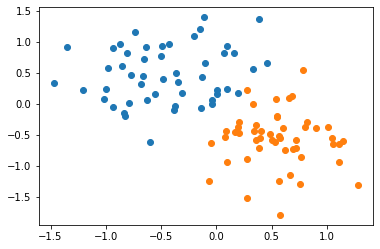

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [0]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y)

In [0]:
import torch.nn as nn

In [0]:
class Model(nn.Module):
  def __init__(self,inputsize,outputsize):
    super().__init__()
    self.linear = nn.Linear(inputsize, outputsize)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))  
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred>=0.5:
      return 1
    else:
      return 0

In [7]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [8]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
  return (w1.item(),w2.item(), b1.item())
print(w1.item(),w2.item(), b1.item())

0.16220331192016602 -0.1682732105255127 0.19390898942947388


In [0]:
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

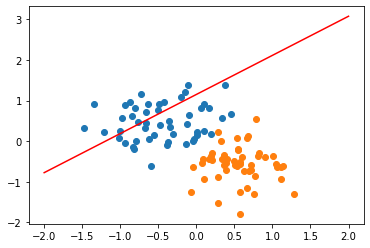

In [10]:
plot_fit('Initial Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

epochs = 1000
losses = []
for i in range(epochs):
  ypred = model.forward(x_data)
  loss = criterion(ypred, y_data)
  print("Epochs : ",i," loss : ", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epochs :  0  loss :  0.6185115575790405
Epochs :  1  loss :  0.6174639463424683
Epochs :  2  loss :  0.6164201498031616
Epochs :  3  loss :  0.6153794527053833
Epochs :  4  loss :  0.614342451095581
Epochs :  5  loss :  0.6133086681365967
Epochs :  6  loss :  0.6122783422470093
Epochs :  7  loss :  0.6112515330314636
Epochs :  8  loss :  0.6102280616760254
Epochs :  9  loss :  0.6092080473899841
Epochs :  10  loss :  0.6081910729408264
Epochs :  11  loss :  0.6071775555610657
Epochs :  12  loss :  0.606167733669281
Epochs :  13  loss :  0.6051608920097351
Epochs :  14  loss :  0.604157567024231
Epochs :  15  loss :  0.6031574606895447
Epochs :  16  loss :  0.602160632610321
Epochs :  17  loss :  0.6011670827865601
Epochs :  18  loss :  0.6001767516136169
Epochs :  19  loss :  0.599189817905426
Epochs :  20  loss :  0.5982059240341187
Epochs :  21  loss :  0.5972254276275635
Epochs :  22  loss :  0.5962479114532471
Epochs :  23  loss :  0.5952739119529724
Epochs :  24  loss :  0.5943028

Text(0.5, 0, 'Epoch')

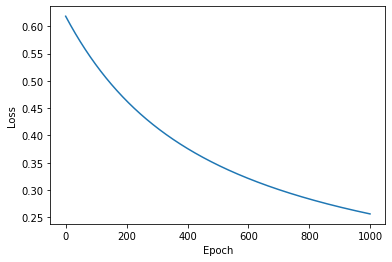

In [13]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

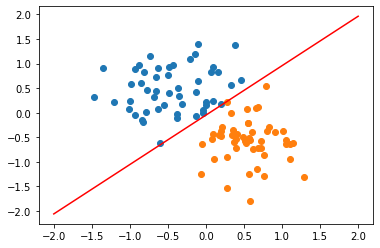

In [14]:
plot_fit('Trained Model')

Red point positive prob = 0.9424158334732056
Black point positive prob = 0.05055497586727142
Red point class 1
Black point class 0


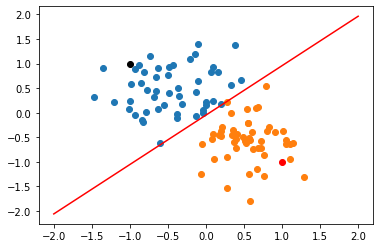

In [16]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1[0], point1[1],'ro')
plt.plot(point2[0], point2[1],'ko')
print("Red point positive prob = {}".format(model.forward(point1).item()))
print("Black point positive prob = {}".format(model.forward(point2).item()))
print("Red point class {}".format(model.predict(point1)))
print("Black point class {}".format(model.predict(point2)))
plot_fit('Trained Model')
